

# Loan Default Probability 

The goal of this case study is to build a machine learning model to predict the probability that a loan will default.

In [1]:
# Disable the warnings
import warnings
warnings.filterwarnings('ignore')

<a id='0'></a>
# 1. Problem Definition

This case study aims to analyze data for loans through 2007-2017Q3 from Lending Club available on Kaggle. Dataset contains over 887 thousand observations and 150 variables among which one is describing the loan status. The predicted variable is “Charge-Off ”. A charge-off is a debt that a creditor has given up trying to collect on after you’ve missed payments for several months. You want a model that can predict charge-off.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

## 2.1. Load all the python packages you need here

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay,
    make_scorer
)
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier
)

<a id='1.2'></a>
## 2.2. Loading the Data

### Load the data

In [3]:
dataset = pd.read_csv('LoansData_sample.csv.gz', compression='gzip', encoding='utf-8')

In [4]:
dataset.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset = dataset.drop(dataset.columns[0], axis=1)

In [6]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataset.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
99995,22454240,NaN,8400.0,8400.0,8400.0,36 months,9.17,267.79,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99996,11396920,NaN,10000.0,10000.0,10000.0,36 months,12.99,336.90,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99997,8556176,NaN,30000.0,30000.0,30000.0,60 months,20.99,811.44,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99998,24023408,NaN,8475.0,8475.0,8475.0,36 months,24.99,336.92,F,F4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99999,24023398,NaN,25000.0,25000.0,25000.0,36 months,10.15,808.45,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Examine the properties of the data frame

In [8]:
dataset.shape

(100000, 150)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 150 entries, id to settlement_term
dtypes: float64(115), int64(1), object(34)
memory usage: 114.4+ MB


In [10]:
dataset.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,1.000000e+05,0.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,...,185.0,185.000000,185.0,185.000000,152.000000,185.000000,185.000000,1290.000000,1290.000000,1290.000000
mean,3.029995e+07,NaN,14886.930000,14886.930000,14883.910500,13.278073,437.331824,7.468924e+04,18.769787,0.343920,...,3.0,110.335568,3.0,14.037838,323.495132,8046.616541,186.563135,4768.376357,47.720519,8.265116
std,4.763500e+06,NaN,8504.432514,8504.432514,8502.519174,4.390210,244.317648,5.809527e+04,8.539769,0.906525,...,0.0,89.266601,0.0,9.657374,267.627244,5585.653253,168.552986,3703.963945,7.046587,8.263566
min,5.716700e+04,NaN,1000.000000,1000.000000,1000.000000,6.000000,30.420000,4.000000e+03,0.000000,0.000000,...,3.0,1.470000,3.0,0.000000,4.410000,174.150000,0.040000,233.160000,0.550000,0.000000
25%,2.737015e+07,NaN,8000.000000,8000.000000,8000.000000,10.150000,261.640000,4.500000e+04,12.320000,0.000000,...,3.0,23.760000,3.0,7.000000,63.885000,2465.360000,27.610000,1951.125000,45.000000,0.000000
50%,3.052556e+07,NaN,13050.000000,13050.000000,13050.000000,12.990000,380.180000,6.400000e+04,18.210000,0.000000,...,3.0,96.580000,3.0,15.000000,281.580000,8049.850000,172.460000,3881.120000,45.040000,6.000000
75%,3.438201e+07,NaN,20000.000000,20000.000000,20000.000000,15.610000,573.320000,9.000000e+04,24.760000,0.000000,...,3.0,164.750000,3.0,22.000000,481.492500,11968.940000,285.890000,6503.000000,50.000000,14.000000
max,3.809811e+07,NaN,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.500000e+06,39.990000,22.000000,...,3.0,382.340000,3.0,32.000000,1147.020000,21750.750000,757.420000,26751.740000,100.000000,36.000000


In [11]:
dataset.isnull().sum()

id                            0
member_id                100000
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                          ...  
settlement_status         98710
settlement_date           98710
settlement_amount         98710
settlement_percentage     98710
settlement_term           98710
Length: 150, dtype: int64

In [12]:
dataset.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)

<a id='2'></a>
## 3. Data Preparation and Feature Selection

<a id='2.1'></a>
## 3.1. Preparing the predicted variable


In [13]:
dataset['loan_status'].value_counts()

Fully Paid            69982
Charged Off           16156
Current               12726
Late (31-120 days)      730
In Grace Period         264
Late (16-30 days)       139
Default                   3
Name: loan_status, dtype: int64

In [14]:
dataset = dataset[dataset['loan_status'].isin(['Fully Paid', 'Charged Off'])]
dataset['loan_status'].value_counts()

Fully Paid     69982
Charged Off    16156
Name: loan_status, dtype: int64

In [15]:
loan_status_counts = dataset['loan_status'].value_counts()
loan_status_percentages = (loan_status_counts / dataset.shape[0]) * 100

print('Percentage distribution:')
print(loan_status_percentages)

Percentage distribution:
Fully Paid     81.24405
Charged Off    18.75595
Name: loan_status, dtype: float64


It appears to be an imbalanced dataset, with approximately an 80%/20% split.

In [16]:
dataset['loan_status'] = dataset['loan_status'].map({'Charged Off':1, 'Fully Paid':0})

<a id='2.2'></a>
## 3.2. Feature Selection-Limit the Feature Space 

The full dataset has 150 features for each
loan. We’ll eliminate
features in following steps using three different approaches:
* Eliminate feature that have more than 30% missing values.
* Eliminate features that are unintuitive based on subjective judgement - I will give you these.
* Eliminate features with low correlation with the predicted variable

<a id='2.2.1'></a>
### 3.2.1.  Features elimination by significant missing values

### Calculating the percentage of missing data for each feature using isnull().mean():

In [17]:
missing_data = dataset.isnull().mean()*100
print(missing_data)

id                         0.000000
member_id                100.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
                            ...    
settlement_status         98.540714
settlement_date           98.540714
settlement_amount         98.540714
settlement_percentage     98.540714
settlement_term           98.540714
Length: 150, dtype: float64


### We drop the columns with more than 30% of missing data.

In [18]:
columns_to_drop = missing_data[missing_data > 30].index

In [19]:
dataset = dataset.drop(columns = columns_to_drop)

In [20]:
dataset.shape

(86138, 92)

<a id='2.2.2'></a>
### 3.2.2.  Features elimination based on the intutiveness

In [21]:
keep_list = ['funded_amnt','addr_state', 'annual_inc', 'application_type', 
             'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 
             'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 
             'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 
             'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 
             'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code',
             'last_pymnt_amnt','num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op',
             "bc_util","bc_open_to_buy","avg_cur_bal","acc_open_past_24mths" ]

We had to remove 'charged_off' because it is not a feature; rather, it is a value within the 'loan_status' feature.

### We drop all of the features except these ones from the dataset.

In [22]:
dataset = dataset[keep_list]
dataset.head()

,funded_amnt,addr_state,annual_inc,application_type,dti,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,...,verification_status,zip_code,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
0,15000.0,VA,78000.0,Individual,12.03,Aug-1994,10+ years,MANAGEMENT,754.0,750.0,...,Source Verified,235xx,12017.81,4.0,1.0,244.0,4.7,9525.0,29828.0,5.0
1,10400.0,CA,58000.0,Individual,14.92,Sep-1989,8 years,Truck Driver Delivery Personel,714.0,710.0,...,Not Verified,937xx,321.08,9.0,1.0,290.0,41.5,7599.0,9536.0,7.0
2,21425.0,MO,63800.0,Individual,18.49,Aug-2003,6 years,Programming Analysis Supervisor,689.0,685.0,...,Source Verified,658xx,17813.19,4.0,7.0,136.0,97.8,324.0,4232.0,4.0
4,7650.0,AZ,50000.0,Individual,34.81,Aug-2002,< 1 year,Technical Specialist,689.0,685.0,...,Source Verified,850xx,17.70,4.0,8.0,148.0,93.2,332.0,5857.0,6.0
5,9600.0,NJ,69000.0,Individual,25.81,Nov-1992,10+ years,Admin Specialist,684.0,680.0,...,Source Verified,077xx,9338.58,7.0,23.0,265.0,69.2,6494.0,3214.0,8.0


In [23]:
dataset.tail()

,funded_amnt,addr_state,annual_inc,application_type,dti,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,...,verification_status,zip_code,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
99994,15000.0,AR,84136.0,Individual,10.43,Nov-1984,10+ years,Senior Clinical Business Solutions Analy,704.0,700.0,...,Not Verified,719xx,10584.91,5.0,3.0,356.0,31.3,28091.0,14311.0,5.0
99995,8400.0,IL,91000.0,Individual,7.78,Aug-1990,2 years,Software Engineer,709.0,705.0,...,Source Verified,606xx,267.50,2.0,5.0,287.0,77.2,2505.0,25364.0,2.0
99996,10000.0,NM,53133.0,Individual,15.25,May-2001,3 years,Assistant Professor of English,694.0,690.0,...,Not Verified,874xx,5594.78,5.0,5.0,158.0,42.5,13974.0,4219.0,3.0
99998,8475.0,MO,52000.0,Individual,17.61,Nov-2000,10+ years,Records Examiner Analyst,664.0,660.0,...,Verified,630xx,336.92,3.0,7.0,164.0,88.0,324.0,3125.0,8.0
99999,25000.0,IN,60000.0,Individual,27.82,Jul-1999,3 years,Occupational Theapy Assistant,734.0,730.0,...,Source Verified,468xx,4759.78,7.0,1.0,180.0,57.4,17153.0,10133.0,5.0


In [24]:
dataset.shape

(86138, 39)

<a id='2.2.3'></a>
### 3.2.3.  Features elimination based on the correlation

### We remove all of the features with a correlation of under 3% with the  charge-off label.

In [25]:
loan_status_corr = dataset.select_dtypes(include=[float, int]).corr()['loan_status'].abs()
low_corr_features = loan_status_corr[loan_status_corr < 0.03]
print(low_corr_features)

id                      0.002221
pub_rec                 0.016023
pub_rec_bankruptcies    0.015815
revol_bal               0.021714
total_acc               0.005804
Name: loan_status, dtype: float64


In [26]:
drop_list = low_corr_features.index
dataset_reduced = dataset.drop(columns = drop_list)

In [27]:
print('Features removed due to low correlation (< 3%) with loan_status:')
print(low_corr_features)

Features removed due to low correlation (< 3%) with loan_status:
id                      0.002221
pub_rec                 0.016023
pub_rec_bankruptcies    0.015815
revol_bal               0.021714
total_acc               0.005804
Name: loan_status, dtype: float64


In [28]:
dataset_reduced.shape

(86138, 34)

<a id='3'></a>
# 4. Feature Engineering and Exploratory Analysis

In [29]:
dataset_reduced.describe()

,funded_amnt,annual_inc,dti,fico_range_high,fico_range_low,installment,int_rate,loan_amnt,loan_status,mort_acc,open_acc,revol_util,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
count,86138.000000,8.613800e+04,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86094.000000,86138.000000,86138.000000,86138.000000,86138.000000,85089.000000,85142.000000,86138.000000,86138.000000
mean,14106.526446,7.384311e+04,18.532747,696.463024,692.462966,430.737187,13.002360,14106.526446,0.187559,1.748880,11.746453,54.582777,4757.453184,5.762358,12.796896,183.524333,63.808959,8942.506507,13066.638371,4.594732
std,8391.139221,5.929352e+04,8.538247,29.731848,29.731549,251.653139,4.397419,8391.139221,0.390362,2.091488,5.433122,23.515901,6466.767327,3.224598,16.224586,93.266430,27.051347,14100.186250,16232.739293,3.070996
min,1000.000000,4.000000e+03,0.000000,664.000000,660.000000,30.420000,6.000000,1000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,7800.000000,4.500000e+04,12.070000,674.000000,670.000000,248.480000,9.490000,7800.000000,0.000000,0.000000,8.000000,37.200000,358.522500,3.000000,3.000000,118.000000,44.100000,1087.000000,3010.000000,2.000000
50%,12000.000000,6.247372e+04,17.950000,689.000000,685.000000,370.480000,12.990000,12000.000000,0.000000,1.000000,11.000000,54.900000,1241.230000,5.000000,8.000000,167.000000,67.700000,3823.000000,6994.500000,4.000000
75%,20000.000000,9.000000e+04,24.500000,709.000000,705.000000,568.005000,15.610000,20000.000000,0.000000,3.000000,14.000000,72.500000,7303.205000,7.000000,15.000000,232.000000,87.500000,10588.000000,17905.000000,6.000000
max,35000.000000,7.500000e+06,39.990000,850.000000,845.000000,1408.130000,26.060000,35000.000000,1.000000,34.000000,84.000000,180.300000,36234.440000,38.000000,372.000000,718.000000,255.200000,249625.000000,447433.000000,53.000000


In [30]:
dataset_reduced.dtypes

funded_amnt              float64
addr_state                object
annual_inc               float64
application_type          object
dti                      float64
earliest_cr_line          object
emp_length                object
emp_title                 object
fico_range_high          float64
fico_range_low           float64
grade                     object
home_ownership            object
initial_list_status       object
installment              float64
int_rate                 float64
loan_amnt                float64
loan_status                int64
mort_acc                 float64
open_acc                 float64
purpose                   object
revol_util               float64
sub_grade                 object
term                      object
title                     object
verification_status       object
zip_code                  object
last_pymnt_amnt          float64
num_actv_rev_tl          float64
mo_sin_rcnt_rev_tl_op    float64
mo_sin_old_rev_tl_op     float64
bc_util   

In [31]:
dataset_reduced.isnull().sum()

funded_amnt                 0
addr_state                  0
annual_inc                  0
application_type            0
dti                         0
earliest_cr_line            0
emp_length               4717
emp_title                4722
fico_range_high             0
fico_range_low              0
grade                       0
home_ownership              0
initial_list_status         0
installment                 0
int_rate                    0
loan_amnt                   0
loan_status                 0
mort_acc                    0
open_acc                    0
purpose                     0
revol_util                 44
sub_grade                   0
term                        0
title                       0
verification_status         0
zip_code                    0
last_pymnt_amnt             0
num_actv_rev_tl             0
mo_sin_rcnt_rev_tl_op       0
mo_sin_old_rev_tl_op        0
bc_util                  1049
bc_open_to_buy            996
avg_cur_bal                 0
acc_open_p

<a id='3.1'></a>
## 4.1 Feature Analysis and Exploration

<a id='3.1.1'></a>
### 4.1.1. Analysing the categorical features 

In [32]:
categorical_features = dataset_reduced.select_dtypes(include=['object']).columns.tolist()
print('Categorical features:', categorical_features)

Categorical features: ['addr_state', 'application_type', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'initial_list_status', 'purpose', 'sub_grade', 'term', 'title', 'verification_status', 'zip_code']


In [33]:
dataset_reduced[categorical_features].head()

,addr_state,application_type,earliest_cr_line,emp_length,emp_title,grade,home_ownership,initial_list_status,purpose,sub_grade,term,title,verification_status,zip_code
0,VA,Individual,Aug-1994,10+ years,MANAGEMENT,C,RENT,w,debt_consolidation,C1,60 months,Debt consolidation,Source Verified,235xx
1,CA,Individual,Sep-1989,8 years,Truck Driver Delivery Personel,A,MORTGAGE,w,credit_card,A3,36 months,Credit card refinancing,Not Verified,937xx
2,MO,Individual,Aug-2003,6 years,Programming Analysis Supervisor,D,RENT,w,credit_card,D1,60 months,Credit card refinancing,Source Verified,658xx
4,AZ,Individual,Aug-2002,< 1 year,Technical Specialist,C,RENT,f,debt_consolidation,C3,36 months,Debt consolidation,Source Verified,850xx
5,NJ,Individual,Nov-1992,10+ years,Admin Specialist,C,RENT,f,debt_consolidation,C3,36 months,Debt consolidation,Source Verified,077xx


In [34]:
dataset_reduced[categorical_features].tail()

,addr_state,application_type,earliest_cr_line,emp_length,emp_title,grade,home_ownership,initial_list_status,purpose,sub_grade,term,title,verification_status,zip_code
99994,AR,Individual,Nov-1984,10+ years,Senior Clinical Business Solutions Analy,B,MORTGAGE,f,debt_consolidation,B2,36 months,Debt consolidation,Not Verified,719xx
99995,IL,Individual,Aug-1990,2 years,Software Engineer,B,MORTGAGE,w,debt_consolidation,B1,36 months,Debt consolidation,Source Verified,606xx
99996,NM,Individual,May-2001,3 years,Assistant Professor of English,C,RENT,f,debt_consolidation,C1,36 months,Debt consolidation,Not Verified,874xx
99998,MO,Individual,Nov-2000,10+ years,Records Examiner Analyst,F,RENT,f,debt_consolidation,F4,36 months,Debt consolidation,Verified,630xx
99999,IN,Individual,Jul-1999,3 years,Occupational Theapy Assistant,B,OWN,w,debt_consolidation,B2,36 months,Debt consolidation,Source Verified,468xx


In [35]:
for feature in categorical_features:
    print(f'{feature}: {dataset[feature].unique()[:5]}, {dataset[feature].nunique()}') 
    # display the 5 first unique values and the number of unique values

addr_state: ['VA' 'CA' 'MO' 'AZ' 'NJ'], 46
application_type: ['Individual'], 1
earliest_cr_line: ['Aug-1994' 'Sep-1989' 'Aug-2003' 'Aug-2002' 'Nov-1992'], 598
emp_length: ['10+ years' '8 years' '6 years' '< 1 year' '2 years'], 11
emp_title: ['MANAGEMENT' 'Truck Driver Delivery Personel'
 'Programming Analysis Supervisor' 'Technical Specialist'
 'Admin Specialist'], 32987
grade: ['C' 'A' 'D' 'B' 'E'], 7
home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'ANY'], 4
initial_list_status: ['w' 'f'], 2
purpose: ['debt_consolidation' 'credit_card' 'home_improvement' 'house' 'medical'], 13
sub_grade: ['C1' 'A3' 'D1' 'C3' 'B5'], 35
term: [' 60 months' ' 36 months'], 2
title: ['Debt consolidation' 'Credit card refinancing' 'Home improvement'
 'Home buying' 'Medical expenses'], 20
verification_status: ['Source Verified' 'Not Verified' 'Verified'], 3
zip_code: ['235xx' '937xx' '658xx' '850xx' '077xx'], 846


### Removing
We can remove **application_type** since it only contains a single value.  
**emp_title** has high variability with many unique values, making it difficult to generalize, so it can be removed.  
**initial_list_status** has only two values and does not add meaningful information, so we can exclude it as well.  
**title** is redundant as it is similar to **purpose**, which we are keeping.  
Lastly, **zip_code** is less informative compared to **addr_state**, so it can be removed.

### Keeping
We can keep **addr_state** since it provides information on geography at state level and has manageable variability.
**earliest_cr_line** even if contains 598 unique values, might provide information on historical credit information.
**emp_length** gives information on employement stability.
**grade** and **sub_grade** represents the credit quality, valuable for default risk.
**home_ownership** can be relevant for financial behavior, in the sense that home owners have more incentive to reimburse their mortgage for example (otherwise can loose their home).
**purpose** captures the reasons for borrowing, and has a manageable number of unique values.
**term** only two unique values, relevant for the analysis.
**verification_status** has small number of unique values and gives information on the verification level of income, directly related to the loan pressure.

The categorical features kept will be converted into numerical form.

In [36]:
dataset_reduced = dataset_reduced.drop(columns=['application_type','emp_title', 'initial_list_status', 'title', 'zip_code'])

### Convert Term to a numerical feature

In [37]:
dataset_reduced['term']

0         60 months
1         36 months
2         60 months
4         36 months
5         36 months
            ...    
99994     36 months
99995     36 months
99996     36 months
99998     36 months
99999     36 months
Name: term, Length: 86138, dtype: object

In [38]:
unique_terms = dataset_reduced['term'].unique()
print(unique_terms)

[' 60 months' ' 36 months']


In [39]:
# Convert 'term' to a numerical feature
dataset_reduced['term'] = dataset_reduced['term'].replace({' 36 months': 0, ' 60 months': 1})

In [40]:
dataset_reduced['term']

0        1
1        0
2        1
4        0
5        0
        ..
99994    0
99995    0
99996    0
99998    0
99999    0
Name: term, Length: 86138, dtype: int64

### Treatment of emp_length

We keep emp_length because the length of employment can signal stability/unstability, hence probability of default risk.

In [41]:
dataset_reduced['emp_length']

0        10+ years
1          8 years
2          6 years
4         < 1 year
5        10+ years
           ...    
99994    10+ years
99995      2 years
99996      3 years
99998    10+ years
99999      3 years
Name: emp_length, Length: 86138, dtype: object

In [42]:
unique_terms2 = dataset_reduced['emp_length'].unique()
print(unique_terms2)

['10+ years' '8 years' '6 years' '< 1 year' '2 years' '9 years' '7 years'
 '3 years' '1 year' nan '4 years' '5 years']


In [43]:
dataset_reduced['emp_length'] = dataset_reduced['emp_length'].replace({'< 1 year': 0, '1 year': 1, '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10})

In [44]:
dataset_reduced['emp_length']

0        10.0
1         8.0
2         6.0
4         0.0
5        10.0
         ... 
99994    10.0
99995     2.0
99996     3.0
99998    10.0
99999     3.0
Name: emp_length, Length: 86138, dtype: float64

In [45]:
dataset_reduced['sub_grade']

0        C1
1        A3
2        D1
4        C3
5        C3
         ..
99994    B2
99995    B1
99996    C1
99998    F4
99999    B2
Name: sub_grade, Length: 86138, dtype: object

In [46]:
unique_terms3 = dataset_reduced['sub_grade'].unique()
print(unique_terms3)

['C1' 'A3' 'D1' 'C3' 'B5' 'B4' 'C4' 'D5' 'B3' 'C5' 'D2' 'C2' 'B2' 'A4'
 'D3' 'B1' 'A5' 'E5' 'F1' 'E4' 'D4' 'E2' 'E1' 'G2' 'G1' 'F3' 'F2' 'A1'
 'A2' 'G3' 'E3' 'F4' 'G4' 'F5' 'G5']


**sub_grade** looks like bond grading so it is probably worth keeping when we want to know about the loan default probability.

<a id='3.1.2'></a>
### 4.1.2. Analysing the continuous features 

### Treatment of Annual Income

#### Feature : Annual Income

In [47]:
dataset_reduced['annual_inc']

0        78000.0
1        58000.0
2        63800.0
4        50000.0
5        69000.0
          ...   
99994    84136.0
99995    91000.0
99996    53133.0
99998    52000.0
99999    60000.0
Name: annual_inc, Length: 86138, dtype: float64

In order to avoid outweighting this feature because of its high values, we will perform a normalisation.

In [48]:
dataset_reduced['annual_inc'] = StandardScaler().fit_transform(dataset_reduced.annual_inc.values.reshape(-1,1))

In [49]:
dataset_reduced['annual_inc']

0        0.070107
1       -0.267200
2       -0.169381
4       -0.402122
5       -0.081681
           ...   
99994    0.173593
99995    0.289357
99996   -0.349283
99998   -0.368392
99999   -0.233469
Name: annual_inc, Length: 86138, dtype: float64

In [50]:
dataset_reduced['annual_inc'].describe()

count    8.613800e+04
mean     2.574813e-16
std      1.000006e+00
min     -1.177928e+00
25%     -4.864491e-01
50%     -1.917487e-01
75%      2.724915e-01
max      1.252447e+02
Name: annual_inc, dtype: float64

### Treatment of the two FICO scores

In [51]:
dataset_reduced['fico_range_low']

0        750.0
1        710.0
2        685.0
4        685.0
5        680.0
         ...  
99994    700.0
99995    705.0
99996    690.0
99998    660.0
99999    730.0
Name: fico_range_low, Length: 86138, dtype: float64

In [52]:
dataset_reduced['fico_range_high']

0        754.0
1        714.0
2        689.0
4        689.0
5        684.0
         ...  
99994    704.0
99995    709.0
99996    694.0
99998    664.0
99999    734.0
Name: fico_range_high, Length: 86138, dtype: float64

In [53]:
fico_corr = dataset_reduced[['fico_range_low', 'fico_range_high']].corr()
print(fico_corr)

                 fico_range_low  fico_range_high
fico_range_low              1.0              1.0
fico_range_high             1.0              1.0


As the correlation is 1, we can create a new feature of the average of the two and standardize it.

In [54]:
dataset_reduced['fico_range_avg'] = (dataset_reduced['fico_range_high'] + dataset_reduced['fico_range_low']) / 2

dataset_reduced = dataset_reduced.drop(columns=['fico_range_high', 'fico_range_low']) # we drop the original features to avoid duplication of information

In [55]:
dataset_reduced['fico_range_avg']

0        752.0
1        712.0
2        687.0
4        687.0
5        682.0
         ...  
99994    702.0
99995    707.0
99996    692.0
99998    662.0
99999    732.0
Name: fico_range_avg, Length: 86138, dtype: float64

In [56]:
dataset_reduced['fico_range_avg'] = StandardScaler().fit_transform(dataset_reduced.fico_range_avg.values.reshape(-1,1))

In [57]:
dataset_reduced['fico_range_avg'].describe()

count    8.613800e+04
mean    -4.517803e-15
std      1.000006e+00
min     -1.091871e+00
25%     -7.555278e-01
50%     -2.510129e-01
75%      4.216738e-01
max      5.147297e+00
Name: fico_range_avg, dtype: float64

<a id='3.2'></a>
## 4.2. Encoding Categorical Data

In [58]:
le = LabelEncoder()
for j in dataset_reduced.columns:  
    if dataset_reduced[j].dtype == 'object':  # check if categorical data
        dataset_reduced[j] = le.fit_transform(dataset_reduced[j].astype(str))
        print(f'Transformed column: {j}')

Transformed column: addr_state
Transformed column: earliest_cr_line
Transformed column: grade
Transformed column: home_ownership
Transformed column: purpose
Transformed column: sub_grade
Transformed column: verification_status


In [59]:
X = dataset_reduced.drop(columns=['loan_status'])  # features
y = dataset_reduced['loan_status']  # target variable

scaler = StandardScaler()

X_standardized = scaler.fit_transform(X)

X_standardized_dataset = pd.DataFrame(X_standardized, columns = X.columns) #back to the df

final_dataset = pd.concat([X_standardized_dataset, y.reset_index(drop = True)], axis = 1)

In [60]:
final_dataset.head()

,funded_amnt,addr_state,annual_inc,dti,earliest_cr_line,emp_length,grade,home_ownership,installment,int_rate,...,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,fico_range_avg,loan_status
0,0.106479,1.498080,0.070107,-0.761607,-1.327004,1.084953,0.179621,1.139163,-0.373918,-0.139255,...,1.122725,-0.546539,-0.727104,0.648422,-2.185078,0.041311,1.032571,0.131967,1.935219,0
1,-0.441722,-1.259750,-0.267200,-0.423128,1.430516,0.541970,-1.303241,-0.980836,-0.435750,-1.367255,...,-0.686030,1.004051,-0.727104,1.141636,-0.824694,-0.095283,-0.217502,0.783225,0.589845,1
2,0.872172,0.042559,-0.169381,-0.005007,-1.276459,-0.001014,0.921051,1.139163,0.340243,0.588449,...,2.018909,-0.546539,-0.357293,-0.509558,1.256545,-0.611237,-0.544251,-0.193662,-0.251013,0
3,-0.769450,-1.336356,-0.402122,1.906404,-1.282075,-1.629964,0.179621,1.139163,-0.677672,0.149552,...,-0.732944,-0.546539,-0.295658,-0.380893,1.086497,-0.610670,-0.444144,0.457596,-0.251013,1
4,-0.537061,0.425591,-0.081681,0.852317,0.896984,1.084953,0.179621,1.139163,-0.414093,0.149552,...,0.708415,0.383815,0.628871,0.873585,0.199290,-0.173652,-0.606964,1.108855,-0.419185,0


In [61]:
final_dataset.tail()

,funded_amnt,addr_state,annual_inc,dti,earliest_cr_line,emp_length,grade,home_ownership,installment,int_rate,...,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,fico_range_avg,loan_status
86133,0.106479,-1.412962,0.173593,-0.949000,0.852055,1.084953,-0.561810,-0.980836,0.215905,-0.648648,...,0.901144,-0.236421,-0.603834,1.849290,-1.201757,1.358039,0.076658,0.131967,0.253502,0
86134,-0.680070,-0.646899,0.289357,-1.259370,-1.349469,-1.086980,-0.561810,-0.980836,-0.647511,-0.871507,...,-0.694316,-1.166775,-0.480563,1.109470,0.495026,-0.456557,0.757570,-0.844920,0.421674,0
86135,-0.489391,0.502197,-0.349283,-0.384478,0.672338,-0.815489,0.179621,1.139163,-0.372885,-0.002811,...,0.129482,-0.236421,-0.480563,-0.273673,-0.787727,0.356841,-0.545052,-0.519291,-0.082841,0
86136,-0.671132,0.042559,-0.368392,-0.108073,0.941913,1.084953,2.403913,1.139163,-0.372806,2.726078,...,-0.683581,-0.856657,-0.357293,-0.209341,0.894269,-0.611237,-0.612447,1.108855,-1.091871,1
86137,1.298219,-0.570292,-0.233469,1.087730,-0.175697,-0.815489,-0.561810,0.079163,1.500935,-0.648648,...,0.000360,0.383815,-0.727104,-0.037788,-0.236920,0.582300,-0.180725,0.131967,1.262532,0


<a id='3.4'></a>
## 4.3. Sampling Data

In [62]:
charged_off_sample = final_dataset[final_dataset['loan_status'] == 1].sample(n=5500, random_state=13)
fully_paid_sample = final_dataset[final_dataset['loan_status'] == 0].sample(n=5500, random_state=13)

balanced_dataset = pd.concat([charged_off_sample, fully_paid_sample])

print('Balanced dataset shape:', balanced_dataset.shape)

Balanced dataset shape: (11000, 28)


In [63]:
balanced_dataset.head()

,funded_amnt,addr_state,annual_inc,dti,earliest_cr_line,emp_length,grade,home_ownership,installment,int_rate,...,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,fico_range_avg,loan_status
8425,-0.411928,-1.259750,-0.408531,1.930999,0.868903,NaN,1.662482,0.079163,-0.624503,1.259300,...,-0.693376,-0.236421,-0.110752,1.506185,0.750098,-0.540670,-0.444329,-0.519291,-0.419185,1
15574,0.261405,-0.340473,-0.570776,2.087941,1.475445,0.270478,1.662482,-0.980836,-0.047753,1.259300,...,-0.670932,-0.236421,0.197424,-0.145008,0.709434,-0.437338,-0.269620,0.131967,0.758017,1
29433,-1.442783,0.732016,-0.435853,1.108812,1.497910,1.084953,0.179621,0.079163,-1.442499,0.079056,...,-0.725208,1.314169,-0.418928,-1.099269,0.395215,-0.286630,-0.444637,0.457596,-0.251013,1
58546,0.198839,0.272378,-0.503314,0.800784,0.402764,NaN,0.921051,-0.980836,0.501220,0.747634,...,-0.649568,0.383815,-0.234022,-0.702554,0.406305,-0.516202,-0.552383,2.737000,-0.755528,1
39595,-0.251043,-1.259750,-0.267200,0.053554,0.891367,1.084953,0.179621,1.139163,-0.577454,0.452004,...,-0.691545,0.693933,-0.665469,0.155209,-0.114929,-0.411310,-0.717790,-0.193662,-0.755528,1


In [64]:
pd.set_option('display.max_rows', None)
balanced_dataset.isnull().sum()

funded_amnt                0
addr_state                 0
annual_inc                 0
dti                        0
earliest_cr_line           0
emp_length               652
grade                      0
home_ownership             0
installment                0
int_rate                   0
loan_amnt                  0
mort_acc                   0
open_acc                   0
purpose                    0
revol_util                 6
sub_grade                  0
term                       0
verification_status        0
last_pymnt_amnt            0
num_actv_rev_tl            0
mo_sin_rcnt_rev_tl_op      0
mo_sin_old_rev_tl_op       0
bc_util                  142
bc_open_to_buy           134
avg_cur_bal                0
acc_open_past_24mths       0
fico_range_avg             0
loan_status                0
dtype: int64

In [65]:
pd.set_option('display.max_rows', 10)

In [66]:
median_values = balanced_dataset.median()

balanced_dataset.fillna(median_values, inplace=True)

print(balanced_dataset.isnull().sum())

funded_amnt             0
addr_state              0
annual_inc              0
dti                     0
earliest_cr_line        0
                       ..
bc_open_to_buy          0
avg_cur_bal             0
acc_open_past_24mths    0
fico_range_avg          0
loan_status             0
Length: 28, dtype: int64


<a id='4'></a>
# 5. Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

### 80:20 split

In [67]:
X = balanced_dataset.drop(columns=['loan_status']) 
y = balanced_dataset['loan_status']                 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Training target set shape:", y_train.shape)
print("Testing target set shape:", y_test.shape)

Training feature set shape: (8800, 27)
Testing feature set shape: (2200, 27)
Training target set shape: (8800,)
Testing target set shape: (2200,)


<a id='4.2'></a>
## 5.2. Test Options and Evaluation Metrics


### Use K-Folds cross validation with 10 folds and 'roc-auc' score.

In [68]:
model = RandomForestClassifier(random_state=13) # example model

kf = KFold(n_splits=10, shuffle=True, random_state=13)

roc_auc_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')

print(f'Mean ROC-AUC score: {roc_auc_scores.mean():.3f}')
print(f'Standard deviation of ROC-AUC scores: {roc_auc_scores.std():.3f}')

Mean ROC-AUC score: 0.934
Standard deviation of ROC-AUC scores: 0.005


<a id='4.3'></a>
## 5.3. Compare Models and Algorithms

In [69]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# Neural Network
models.append(('NN', MLPClassifier()))
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))

### K-folds cross validation

#### Takes time to run (1-3 min)

In [70]:
results = {}
all_cross_val_results = []

for name, model in models:
    cross_val_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')
    results[name] = {
        'Mean ROC-AUC': cross_val_results.mean(),
        'Standard Deviation': cross_val_results.std()
    }
    for score in cross_val_results:
        all_cross_val_results.append({'Model': name, 'ROC-AUC': score})

for model_name, metrics in results.items():
    print(f"{model_name}: Mean ROC-AUC = {metrics['Mean ROC-AUC']:.3f}, Standard Deviation = {metrics['Standard Deviation']:.3f}")

LR: Mean ROC-AUC = 0.924, Standard Deviation = 0.009
KNN: Mean ROC-AUC = 0.792, Standard Deviation = 0.020
DT: Mean ROC-AUC = 0.805, Standard Deviation = 0.014
NB: Mean ROC-AUC = 0.908, Standard Deviation = 0.009
NN: Mean ROC-AUC = 0.909, Standard Deviation = 0.008
AB: Mean ROC-AUC = 0.931, Standard Deviation = 0.006
RF: Mean ROC-AUC = 0.934, Standard Deviation = 0.005


### Plot a model comparison using a BoxPlot to capture the range of values coming from the K Folds for each model

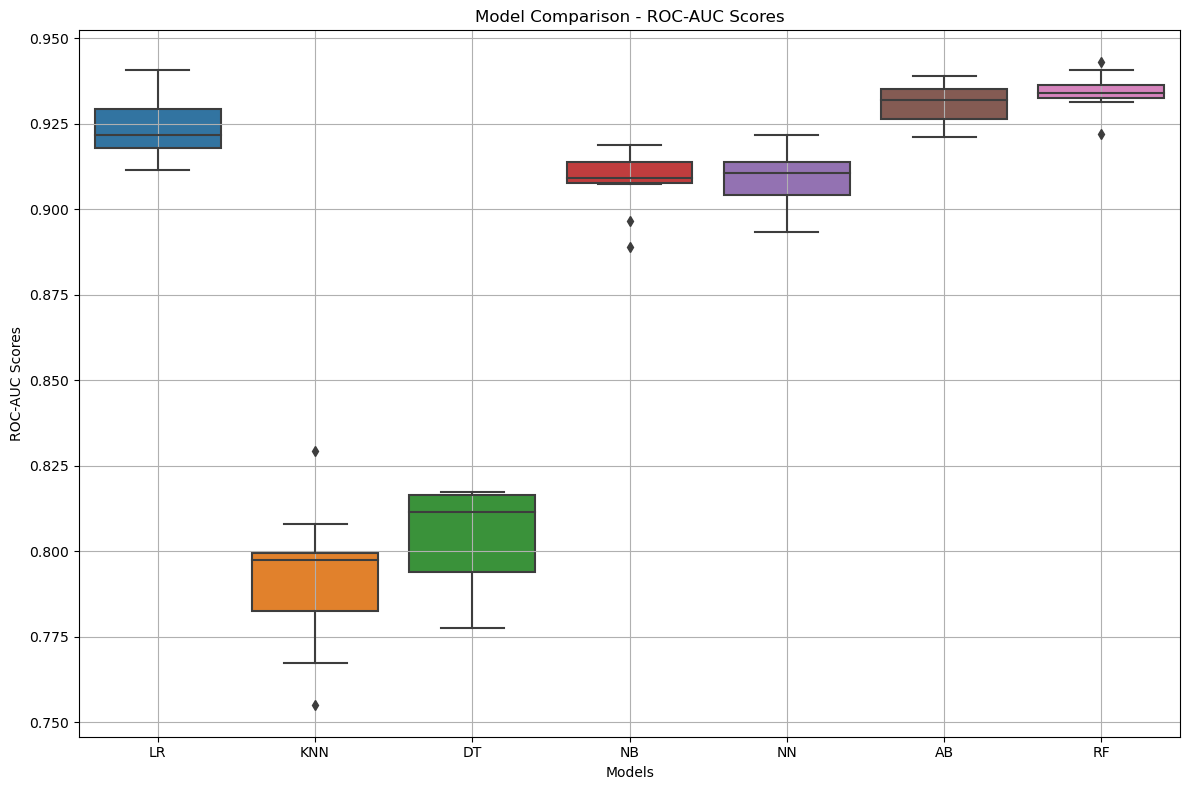

In [71]:
results_df = pd.DataFrame(all_cross_val_results)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Model', y='ROC-AUC', data=results_df)

plt.title('Model Comparison - ROC-AUC Scores')
plt.xlabel('Models')
plt.ylabel('ROC-AUC Scores')
plt.grid(True)
plt.tight_layout()
plt.show()

<a id='5'></a>
# 6. Model Tuning and Grid Search

In [72]:
best_model = RandomForestClassifier() # as it is the model with the best mean ROC-AUC Score

In [73]:
params_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 200],
    'max_features': [5, 10, 20]
}

In [74]:
grid_search = GridSearchCV(best_model, params_grid, cv=kf, scoring='accuracy', verbose = False, n_jobs=-1) # n_jobs=-1 is parallel processing to reduce computation time
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=13, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': [5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=False)

In [75]:
print('Best parameters:', grid_search.best_params_)
print('Best ROC-AUC score:', grid_search.best_score_)

Best parameters: {'max_depth': 10, 'max_features': 10, 'n_estimators': 200}
Best ROC-AUC score: 0.8594318181818181


<a id='6'></a>
# 7. Final Model

In [76]:
final_model = grid_search.best_estimator_

<a id='6.1'></a>
## 7.1. Results on the Test Dataset

In [77]:
y_pred = final_model.predict(X_test)

In [78]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8759090909090909


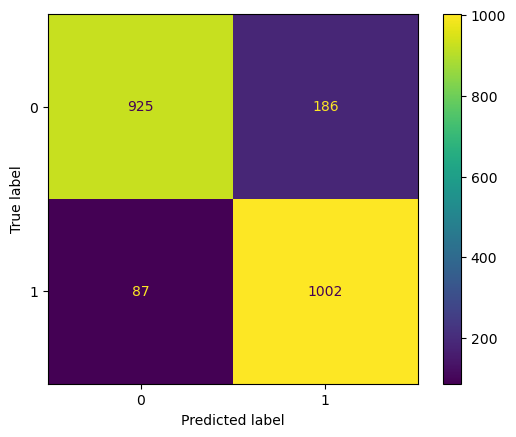

In [79]:
confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()
plt.show()

In [80]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87      1111
           1       0.84      0.92      0.88      1089

    accuracy                           0.88      2200
   macro avg       0.88      0.88      0.88      2200
weighted avg       0.88      0.88      0.88      2200



### Calculate the ROC curve for the model and its AUC

In [81]:
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

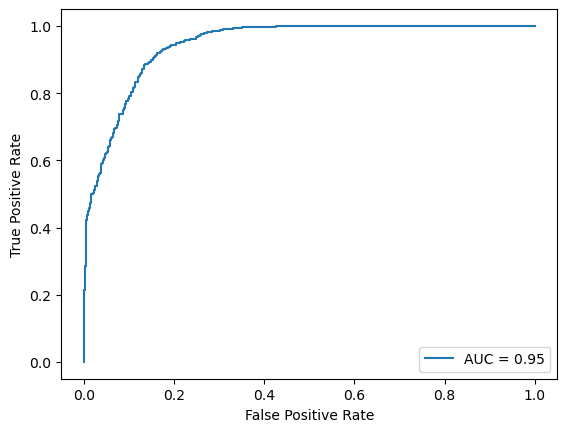

In [83]:
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

<a id='6.2'></a>
## 7.2. Variable Intuition/Feature Importance
Looking at the details above GBM might be worthy of further study.
Let us look into the Feature Importance of the GBM model

In [84]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [85]:
feature_importances = gbm.feature_importances_

In [86]:
df_features = pd.DataFrame({'features':X_train.columns, 'importances':feature_importances})

In [87]:
df_features.sort_values('importances',ascending=False)

,features,importances
18,last_pymnt_amnt,0.760296
16,term,0.105896
15,sub_grade,0.043957
8,installment,0.020437
9,int_rate,0.018370
...,...,...
19,num_actv_rev_tl,0.000253
5,emp_length,0.000208
1,addr_state,0.000201
11,mort_acc,0.000187


## Conclusion

### Write a short summary of what you have found.

In conclusion, this loan default probability analysis aimed at building a predictive model for identifying loans status class (ie charge off or fully paid) using a dataset of borrower characteristics. We reduced the dataset from an overwhelming 150 features to a more manageable subset of predictive variables. This allowed us to retain only the most relevant and interpretable features, enhancing both model interpretability and performance. 

We prepared the dataset for evaluating various classification models. We found that the ensemble method Random Forest was the best classifier, achieving an accuracy and F1 score of 0.87, along with a ROC-AUC of 0.94. Other ensemble methods like AdaBoost Classifier and Logistic Regression achieved high accuracy and stability across cross-validation folds. We performed Model tuning and hyperparameter optimization using GridSearchCV. We also tested a Voting Classifier, which yielded similar performance metrics, but with shorter computation time.

The final selected model, based on ROC-AUC demonstrated good predictive capabilities, but we still need to reduce false negative predictions. This model could serve as a valuable asset in credit risk management, helping lenders make more informed, data-driven decisions about loan approval and risk exposure. 